In [161]:
import pandas as pd
import pandasql as psql

df = pd.read_csv("/Users/toby/Desktop/NHS/OR_AE2_Project_Adjusted.csv",index_col = False)
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


ANALYSIS BY SITE

In [162]:
#cleaning of Wait_Time
lis = [30*i for i in range(1,11)]
for i in lis:
    df.loc[df['Wait_Time'] == f'{i}-{i+29}', 'Wait_Time'] = i + 15

df.loc[df['Wait_Time'] == '360+', 'Wait_Time'] = 360
df.loc[df['Wait_Time'] == '00-29', 'Wait_Time'] = 15
df['Wait_Time'] = df['Wait_Time'].astype('int64')
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,15,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,15,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,15,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,15,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,15,1,6,2


In [163]:
#total attendance for each site
df_attendance= psql.sqldf('SELECT Site_Code, SUM(Number_Of_Attendances) as agg_attendance FROM df GROUP BY Site_Code ORDER BY agg_attendance DESC')
df_attendance

,Site_Code,agg_attendance
0,11,449377
1,2,284506
2,5,224775
3,4,191466
4,8,183602
5,1,137687
6,7,134063
7,10,82842
8,6,65299
9,3,48118


In [164]:
#Average waiting time and total attendance and for each AE
df_site = psql.sqldf("SELECT a.Site_Code,a.Site_X, a.Site_Y ,b.agg_attendance, SUM(a.Wait_Time * a.Number_Of_Attendances)/b.agg_attendance AS avg_waiting,b.agg_attendance*100/a.Site_Pop_20miles FROM df a LEFT JOIN df_attendance b ON a.Site_Code = b.Site_Code GROUP BY a.Site_Code, a.Site_X, a.Site_Y ORDER BY avg_waiting DESC").set_index('Site_Code')
df_site


,Site_X,Site_Y,agg_attendance,avg_waiting,b.agg_attendance*100/a.Site_Pop_20miles
Site_Code,,,,,
11,27024,111909,449377,171,27
2,39785,114688,284506,168,15
7,34629,117035,134063,166,7
10,54562,114442,82842,165,4
1,4258,124892,137687,163,40
6,57894,104081,65299,163,4
5,33369,114746,224775,161,12
8,40269,103066,183602,161,10
9,18043,129799,10207,138,1


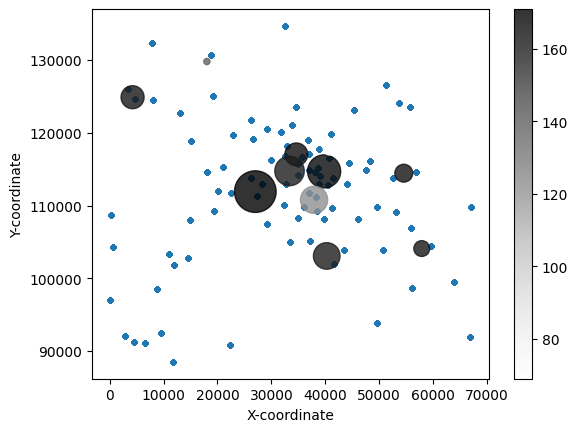

In [165]:
#Site Graph
import matplotlib.pyplot as plt

plt.scatter(df['Pat_X'], df['Pat_Y'], marker = '.')
plt.scatter(df_site['Site_X'], df_site['Site_Y'], s = df_site['agg_attendance']/500, c=df_site['avg_waiting'],alpha = 0.8, cmap = 'Greys')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.colorbar()

ANALYSIS BY PATIENT

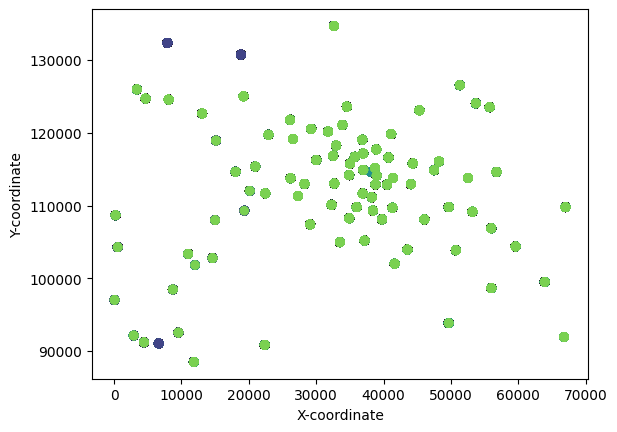

In [168]:
#plot table with number of patients as size